In [1]:
# IMDB 데이터셋(케라스 내장 데이터셋, 숫자로 전처리 되어 있음, 17MB 정도의 데이터셋)
# 영화 리뷰 50,000개의 데이터셋(학습용 25,000, 검증용 25,000, 각각 50%는 부정 50%는 긍정 리뷰르 구성)
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

np.random.seed(7)

top_words=5000 # 상위 단어 5000개
(X_train, y_train), (X_test, y_test)=imdb.load_data(num_words=top_words) # 학습용, 검증용 5:5
print(X_train.shape)
print(X_test.shape)
print(X_train[0])
max_review_length=500 # 리뷰의 최대 길이를 500으로 설정
# 길이가 짧으면 공백으로 채움
X_train=sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test=sequence.pad_sequences(X_test, maxlen=max_review_length)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 500)
(25000, 500)
[   0    0    0    0    0    0 

In [2]:
# Embedding
from tensorflow.keras.models import Sequential
from keras.layers.embeddings import Embedding

model=Sequential()
words={'I':0, 'am':1, 'a':2, 'boy':3}
# keras 신경망에 벡터를 입력하는 방법
model.add(Embedding(5,1,input_length=1)) # Embedding(단어 개수, 벡터 크기, 입력 사이즈(최대 단어 개수))

# 가중치 값
embeddings=model.layers[0].get_weights()[0]
words_embeddings={w:embeddings[idx] for w, idx in words.items()}
print(words_embeddings)
print(words_embeddings['boy'])

{'I': array([0.01530621], dtype=float32), 'am': array([0.01436014], dtype=float32), 'a': array([-0.0310688], dtype=float32), 'boy': array([-0.01288029], dtype=float32)}
[-0.01288029]


In [3]:
from tensorflow.keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import Dense

# create the model
embedding_vector_length=32 # 벡터 사이즈
model=Sequential()
# 임베딩 레이어 Embedding(단어 개수, 벡터 크기, 입력 사이즈(최대 단어 개수))
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
# 문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
hist=model.fit(X_train[:1000], y_train[:1000], epochs=20, batch_size=64)

Epoch 1/20
16/16 [==============================] - 1s 60ms/step - loss: 2.3231e-04 - accuracy: 1.0000
Epoch 2/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5412 - accuracy: 0.7580
Epoch 3/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5304 - accuracy: 0.6920
Epoch 4/20
16/16 [==============================] - 1s 59ms/step - loss: 0.4214 - accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 59ms/step - loss: 0.3059 - accuracy: 0.8920
Epoch 6/20
16/16 [==============================] - 1s 58ms/step - loss: 0.1977 - accuracy: 0.9520
Epoch 7/20
16/16 [==============================] - 1s 60ms/step - loss: 0.1309 - accuracy: 0.9770
Epoch 8/20
16/16 [==============================] - 1s 58ms/step - loss: 0.0586 - accuracy: 0.9970
Epoch 9/20
16/16 [==============================] - 1s 55ms/step - loss: 0.0310 - accuracy: 0.9950
Epoch 10/20
16/16 [==============================] - 1s 56ms/step - loss: 0.0182 - accuracy: 0.9990
Epoch

In [9]:
# Final evaluation of the model
scores=model.evaluate(X_train[:1000], y_train[:1000], verbose=1)
print(f'Accuracy : {scores[1]*100:.2f}')
scores=model.evaluate(X_test[:1000], y_test[:1000], verbose=1)
print(f'Accuracy : {scores[1]*100:.2f}')

32/32 [==============================] - 0s 13ms/step - loss: 0.0014 - accuracy: 1.0000
Accuracy : 100.00
32/32 [==============================] - 0s 14ms/step - loss: 0.9159 - accuracy: 0.7700
Accuracy : 77.00


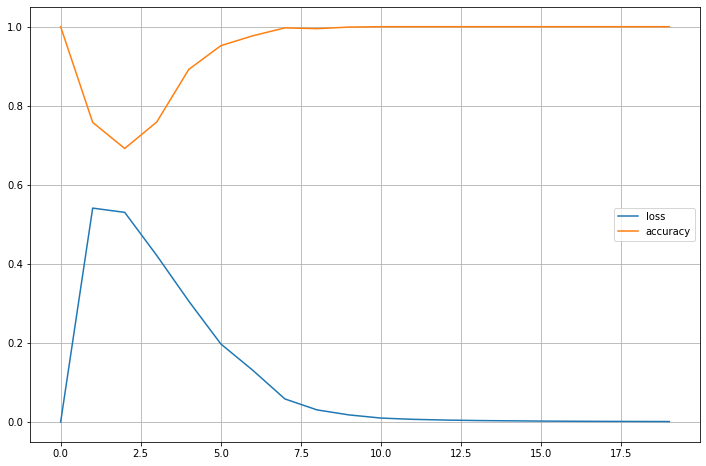

In [10]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()